## **Conjunto de datos Caltech-101**
Caltech-101 es un conjunto de datos ampliamente utilizado para tareas de reconocimiento de objetos.  
* **Imagenes:** 9000  
* **Categorias de objetos:** 101  

#### **Características clave**  
* Las categorías abarcan una amplia variedad de objetos, incluidos animales, vehículos, artículos para el hogar y personas.  
* La cantidad de imágenes por categoría varía, con alrededor de 40 a 800 imágenes en cada categoría.  
* Las imágenes son de tamaños variables y la mayoría de las imágenes tienen una resolución media.  

#### **Estructura del conjunto de datos**
* El conjunto de datos Caltech-101 no está dividido formalmente en conjuntos de entrenamiento y prueba.  
* Los usuarios suelen crear sus propias divisiones en función de sus necesidades específicas. Sin embargo, una práctica común es utilizar un subconjunto aleatorio de imágenes para el entrenamiento (por ejemplo, 30 imágenes por categoría) y las imágenes restantes para las pruebas.

#### **Aplicaciones**
* El conjunto de datos Caltech-101 se utiliza ampliamente para entrenar y evaluar modelos de aprendizaje profundo en tareas de reconocimiento de objetos, como redes neuronales convolucionales **(CNN)**, máquinas de vectores de soporte **(SVM)** y varios otros algoritmos de aprendizaje automático.  
* Su amplia variedad de categorías e imágenes de alta calidad lo convierten en un excelente conjunto de datos para la investigación y el desarrollo en el campo del aprendizaje automático y la visión por computadora.

## Importar Librerías

In [ ]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')  # Desactiva el GPU predeterminado
import math, time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from PIL import Image

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import specificity_score
from keras import models
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import model_from_json

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from keras.applications import VGG16, ResNet50, Xception, InceptionResNetV2, MobileNetV2
from keras.layers import GlobalMaxPool2D, GlobalAveragePooling2D, concatenate
from keras.utils import to_categorical

import os
import cv2
import zipfile

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

print('Módulos importados')

Módulos importados


## Extracción de Archivos y Preparación de Datos

Archivos extraídos: ['Objetos', 'caltech-101', '.ipynb_checkpoints']


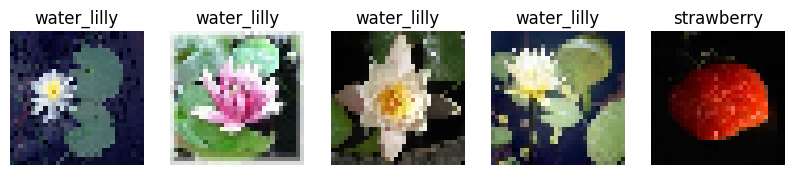

Preparación de datos completada


In [ ]:
zip_file = "caltech-101.zip"  # Reemplaza esto por el nombre real de tu archivo ZIP

# Directorio de destino para extraer los archivos
extract_dir = "dataset"  # Puedes cambiar esto por el directorio de destino deseado

# Extraer el archivo ZIP
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verificar la extracción
extracted_files = os.listdir(extract_dir)
print("Archivos extraídos:", extracted_files)

# Preparación de Datos
# Listas para almacenar los datos
X = []  # Imágenes
y = []  # Etiquetas

# Recorrer todas las categorías
categories = ['butterfly', 'camera', 'platypus', 'snoopy', 'strawberry', 'sunflower', 'water_lilly']
for i, category in enumerate(categories):
    category_dir = os.path.join(data_dir, category)
    image_files = os.listdir(category_dir)
    # Añadir las imágenes y sus etiquetas a las listas X e y
    for img_file in image_files:
        img_path = os.path.join(category_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32, 32))  # Redimensionar a 32x32 píxeles
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
        X.append(img)
        y.append(i)  # Usar el índice como etiqueta

# Convertir las listas a arrays numpy
X = np.array(X)
y = np.array(y)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalización de datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Visualizar las primeras 5 imágenes del conjunto de entrenamiento
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i].reshape(32, 32, 3))  # No especificamos cmap para mostrar imágenes a color
    plt.title(categories[y_train[i]])
    plt.axis('off')
plt.show()

print('Preparación de datos completada')

## Extracción y Visualizacion de Imágenes

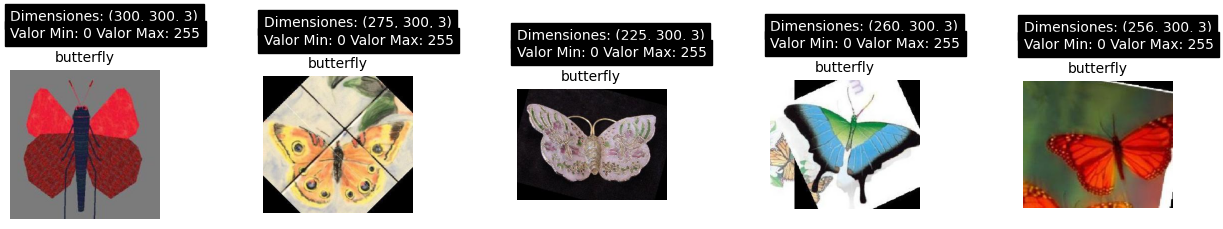

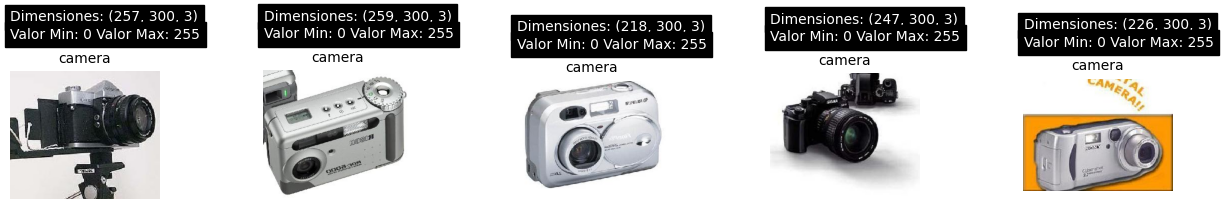

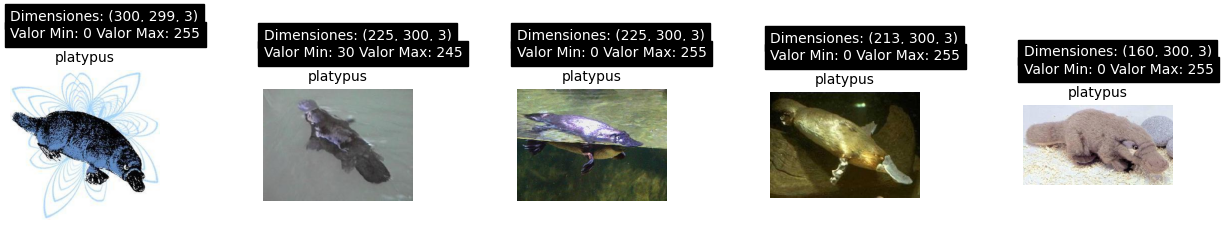

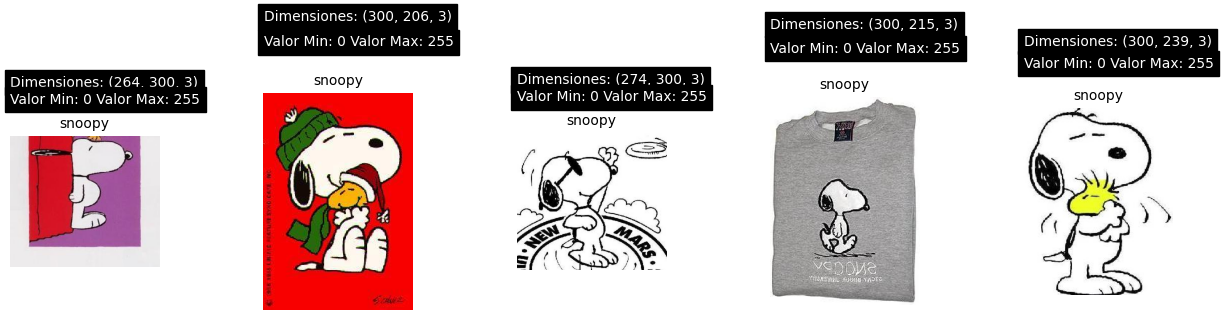

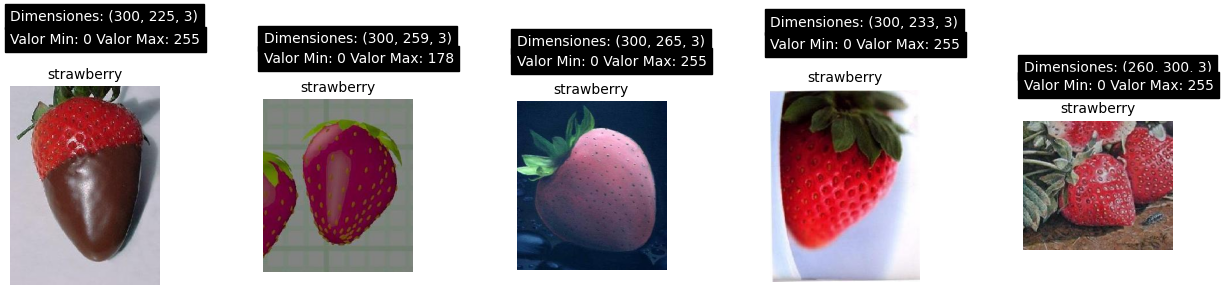

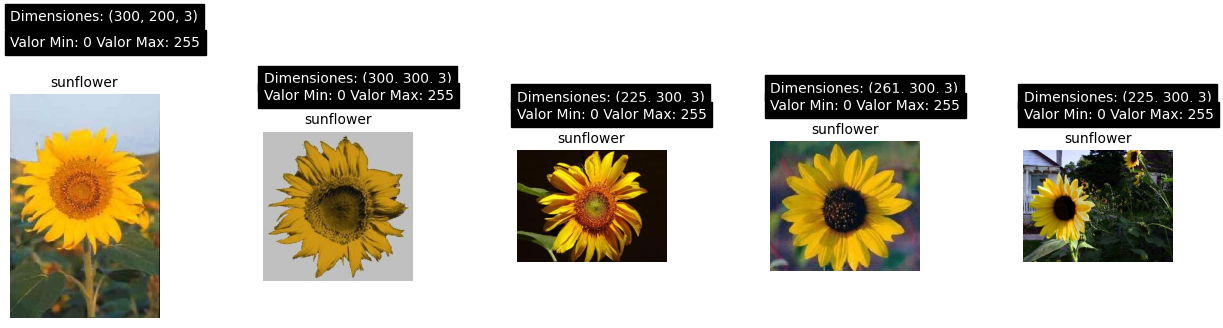

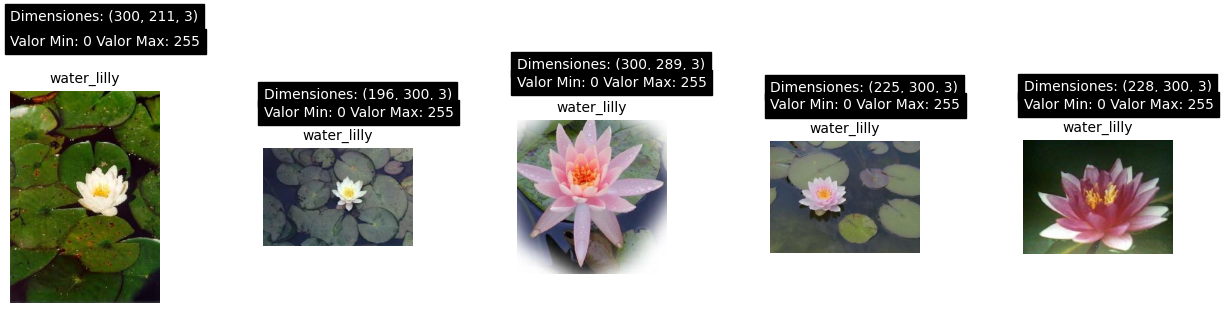

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Directorio de las imágenes
data_dir = '/content/dataset/caltech-101'  # Reemplaza esto con el directorio donde se encuentren tus imágenes

# Función para visualizar imágenes de una categoría
def visualize_images(category, num_images=5):
    category_dir = os.path.join(data_dir, category)
    image_files = os.listdir(category_dir)[:num_images]
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    fig.subplots_adjust(wspace=0.7, hspace=0.3)  # Ajustar el espacio entre subplots
    for ax in axes:
        ax.axis('off')
    for i, (img_file, ax) in enumerate(zip(image_files, axes)):
        img_path = os.path.join(category_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
        ax.imshow(img)
        ax.set_title(category, fontsize=10)  # Tamaño de la fuente para el nombre de la categoría
        # Mostrar las dimensiones de la imagen
        img_shape = img.shape
        ax.text(0, -100, f"Dimensiones: {img_shape}", color='white', fontsize=10, backgroundcolor='black')  # Ajustar posición vertical
        # Calcular y mostrar el valor mínimo y máximo de la imagen
        sample_image = cv2.imread(img_path)
        ax.text(0, -65, f"Valor Min: {sample_image.min()} Valor Max: {sample_image.max()}", color='white', fontsize=10, backgroundcolor='black')  # Ajustar posición vertical
    plt.show()

# Visualizar imágenes de algunas categorías
categories = ['butterfly', 'camera', 'platypus', 'snoopy', 'strawberry', 'sunflower', 'water_lilly']
for category in categories:
    visualize_images(category)


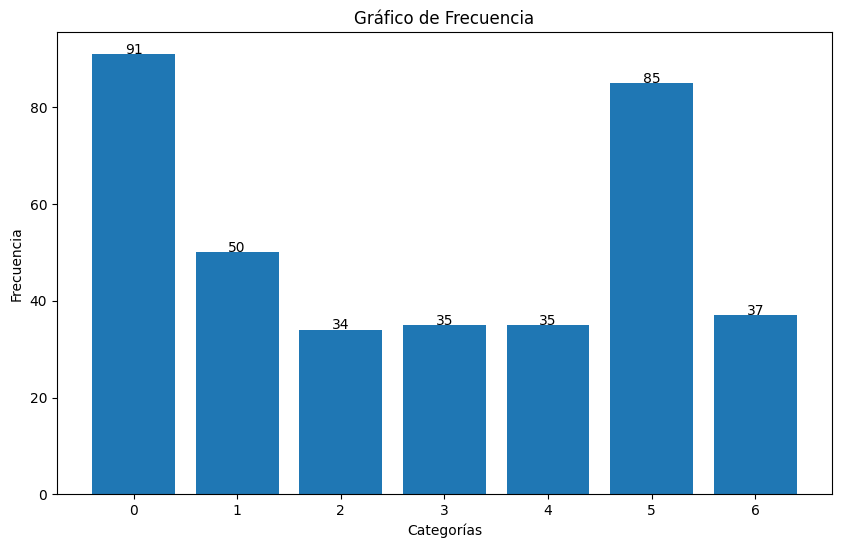

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
Y=y_train.tolist()
Y.extend(y_test.tolist()) #para analizar la frecuencia de todo el conjunto de datos

frecuencias = Counter(Y)

# Separa las claves (elementos) y los valores (frecuencias) en listas separadas
elementos = list(frecuencias.keys())
frecuencias = list(frecuencias.values())

plt.figure(figsize=(10, 6))

plt.bar(elementos, frecuencias)

plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Frecuencia')

plt.xticks(elementos)

# Muestra los valores de los elementos en el gráfico
for i, v in enumerate(frecuencias):
    plt.text(elementos[i], v + 0.1, str(v), ha='center')

plt.show()

## Funciones para Guardar y Cargar Modelos

In [ ]:
def guardarObjeto(pipeline, nombreArchivo):
    print("Guardando Objeto en Archivo")
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("Objeto Guardado en Archivo")

def cargarObjeto(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
        print("Objeto Cargado desde Archivo")
    return pipeline

# Funciones para guardar y cargar la Red Neuronal (Arquitectura y Pesos)
def guardarNN(model, nombreArchivo):
    print("Guardando Red Neuronal en Archivo")
    model.save(nombreArchivo+'.h5')
    print("Red Neuronal Guardada en Archivo")

def cargarNN(nombreArchivo):
    model = load_model(nombreArchivo+'.h5')
    print("Red Neuronal Cargada desde Archivo")
    return model


## Entrenamiento y Evaluación de Modelos SVM

In [ ]:
print('SVM Classifier with gamma = 0.1; Kernel = Polynomial')
classifierSVM = SVC(gamma=0.1, kernel='poly', C=1.0, verbose=True)

classifierSVM.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Predicciones del conjunto de Test
y_pred = classifierSVM.predict(X_test.reshape(X_test.shape[0], -1))
acc_svm = accuracy_score(y_test, y_pred)  # accuracy_score hace lo mismo que la función score
print('\nSVM Accuracy: ', acc_svm)

def obtenerResultados(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    specificity = specificity_score(y_test, y_pred, average='macro')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall o Sensitivity:", recall)
    print("F1-Score:", f1)
    print("Specificity:", specificity)
    return accuracy, precision, recall, f1, specificity

resultados_svm = obtenerResultados(y_test, y_pred)
guardarObjeto(classifierSVM, 'dataset/Objetos/classifierSVM')

SVM Classifier with gamma = 0.1; Kernel = Polynomial
[LibSVM]
SVM Accuracy:  0.5
Accuracy: 0.5
Precision: 0.5127551020408163
Recall o Sensitivity: 0.45387154861944773
F1-Score: 0.4734230055658627
Specificity: 0.9123603964723788
Guardando Objeto en Archivo
Objeto Guardado en Archivo


## Entrenamiento de CNN

In [ ]:
classifierCNN = Sequential()
input_shape = (32, 32, 3)
num_classes = 7

classifierCNN.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
classifierCNN.add(Conv2D(32, (3, 3), activation='relu'))
classifierCNN.add(MaxPooling2D(pool_size=(2, 2)))
classifierCNN.add(Dropout(0.25))

classifierCNN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
classifierCNN.add(Conv2D(64, (3, 3), activation='relu'))
classifierCNN.add(MaxPooling2D(pool_size=(2, 2)))
classifierCNN.add(Dropout(0.25))

classifierCNN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
classifierCNN.add(Conv2D(64, (3, 3), activation='relu'))
classifierCNN.add(MaxPooling2D(pool_size=(3, 3)))
classifierCNN.add(Dropout(0.25))

classifierCNN.add(Flatten())
classifierCNN.add(Dense(512, activation='relu'))
classifierCNN.add(Dropout(0.5))
classifierCNN.add(Dense(num_classes, activation='softmax'))

classifierCNN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifierCNN.summary()

batch_size = 64
epochs = 20
h = classifierCNN.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

guardarNN(classifierCNN, 'dataset/Objetos/classifierCNN')

test_acc_cnn = classifierCNN.evaluate(X_test, y_test, verbose=0)
acc_cnn = test_acc_cnn[1]
print('\nCNN Accuracy: ', acc_cnn)

# Predicciones del conjunto de Test
y_pred = classifierCNN.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
resultados_cnn = obtenerResultados(y_test, y_pred)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_29 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        36928     
                                                     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



CNN Accuracy:  0.5405405163764954
3/3 [==============================] - 1s 37ms/step
Accuracy: 0.5405405405405406
Precision: 0.33499775078722444
Recall o Sensitivity: 0.46937441643323996
F1-Score: 0.38175675675675674
Specificity: 0.9197028919580401


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Preparación de Datos y Entrenamiento de CNN con Transfer Learning

In [ ]:
def build_vgg16(shape=(32, 32, 3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=shape)
    base_model.trainable = False
    model = Sequential()
    model.add(base_model)
    model.add(GlobalMaxPool2D())
    return model

def action_model(shape=(32, 32, 3), nbout=10):
    convnet = build_vgg16(shape)
    model = Sequential()
    model.add(convnet)
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nbout, activation='softmax'))
    return model

INSHAPE = (32, 32, 3)
nbout = 7
modelCNN_TL = action_model(INSHAPE, nbout)
modelCNN_TL.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelCNN_TL.summary()

epocas = 5
history = modelCNN_TL.fit(X_train, y_train, epochs=epocas, verbose=2, batch_size=64, validation_data=(X_test, y_test))

test_acc_cnn_tl = modelCNN_TL.evaluate(X_test, y_test, verbose=0)
acc_cnn_tl = test_acc_cnn_tl[1]
print('\nCNN_TL Accuracy: ', acc_cnn_tl)

# Predicciones del conjunto de Test
y_pred = modelCNN_TL.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
resultados_cnn_tl = obtenerResultados(y_test, y_pred)

guardarNN(modelCNN_TL, 'dataset/Objetos/modelCNN_TL')


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_19 (Sequential)  (None, 512)               14714688  
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 7)                 1799      
                                                                 
Total params: 14847815 (56.64 MB)
Trainable params: 133127 (520.03 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/5
5/5 - 8s - loss: 2.0162 - accuracy: 0.1911 - val_loss: 1.5877 - val_accuracy: 0.4865 - 8s/epoch - 2s/step
Epoch 2/5
5/5 - 2s - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Red Neuronal Guardada en Archivo


## Evaluación Adicional y Matrices de Confusión

Mean Absolute Error (MAE): 0.8243243243243243
Mean Squared Error (MSE): 3.310810810810811
Root Mean Squared Error (RMSE): 1.8195633571851273


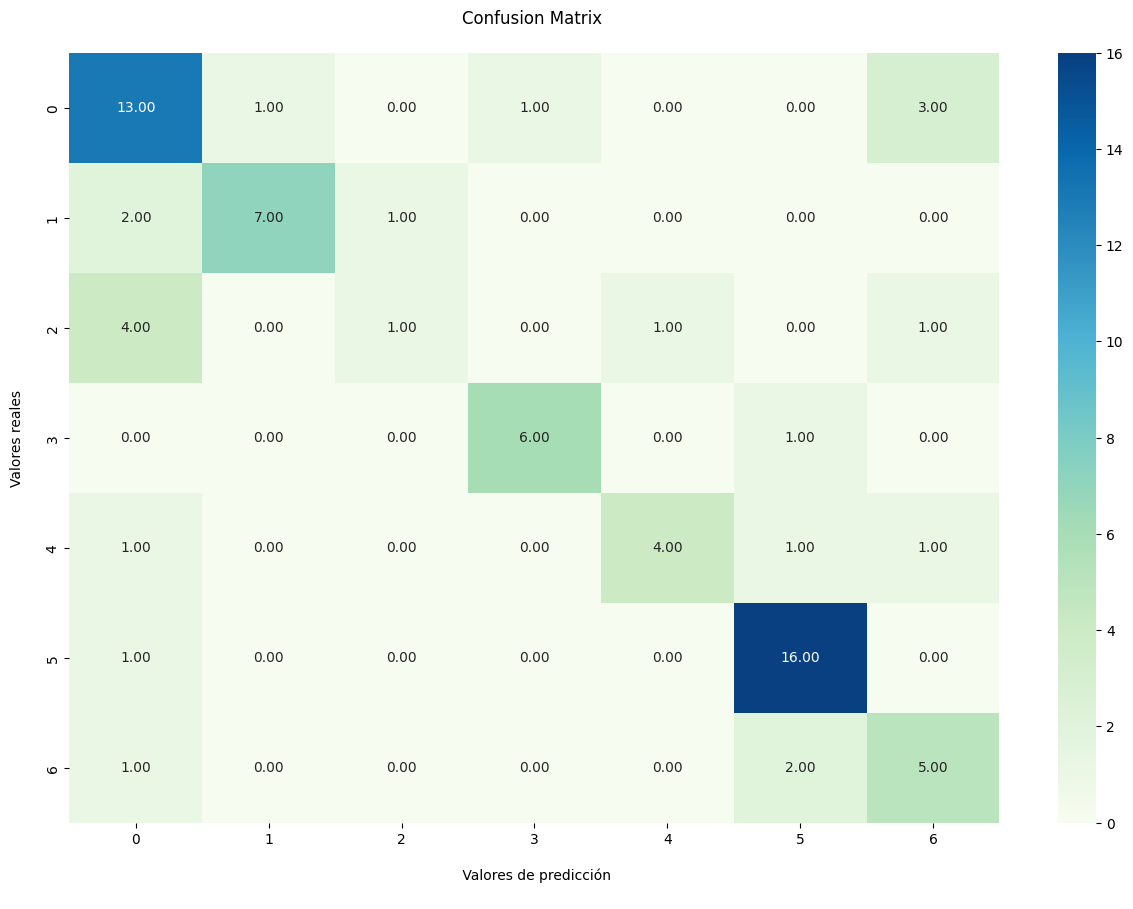

              precision    recall  f1-score   support

           0       0.59      0.72      0.65        18
           1       0.88      0.70      0.78        10
           2       0.50      0.14      0.22         7
           3       0.86      0.86      0.86         7
           4       0.80      0.57      0.67         7
           5       0.80      0.94      0.86        17
           6       0.50      0.62      0.56         8

    accuracy                           0.70        74
   macro avg       0.70      0.65      0.66        74
weighted avg       0.70      0.70      0.69        74

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


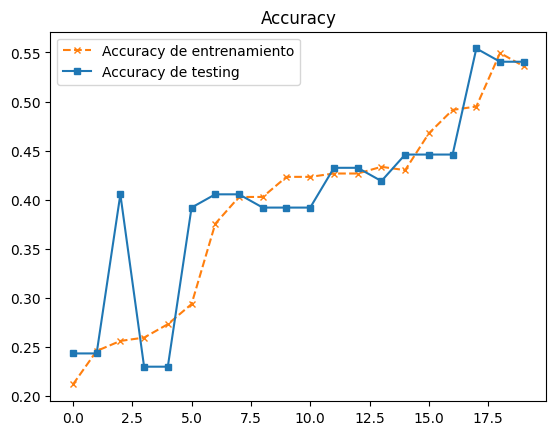

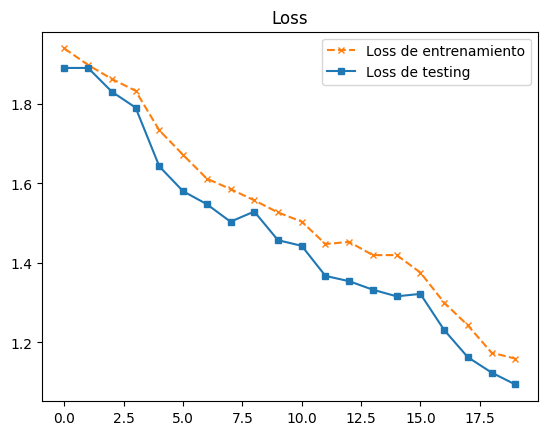

In [ ]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error (MAE):', MAE)
print('Mean Squared Error (MSE):', MSE)
print('Root Mean Squared Error (RMSE):', RMSE)

plt.figure(figsize=(15, 10))
fx = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", cmap="GnBu")
fx.set_title('Confusion Matrix \n')
fx.set_xlabel('\n Valores de predicción\n')
fx.set_ylabel('Valores reales\n')
plt.show()

print(classification_report(y_test, y_pred))

print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, marker='x', linestyle='--', color='C1', ms=5, label='Accuracy de entrenamiento')
plt.plot(epochs, val_accuracy, marker='s', linestyle='-', color='C0', ms=5, label='Accuracy de testing')
plt.title('Accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, marker='x', linestyle='--', color='C1', ms=5, label='Loss de entrenamiento')
plt.plot(epochs, val_loss, marker='s', linestyle='-', color='C0', ms=5, label='Loss de testing')
plt.title('Loss')
plt.legend()
plt.show()


## Visualización de Mapas de Activación

1/1 [==============================] - 0s 70ms/step
max_pooling2d_16 (1, 15, 15, 32)


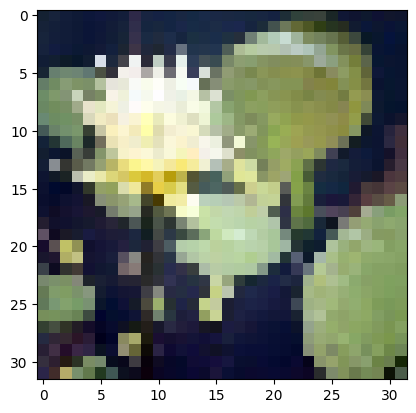

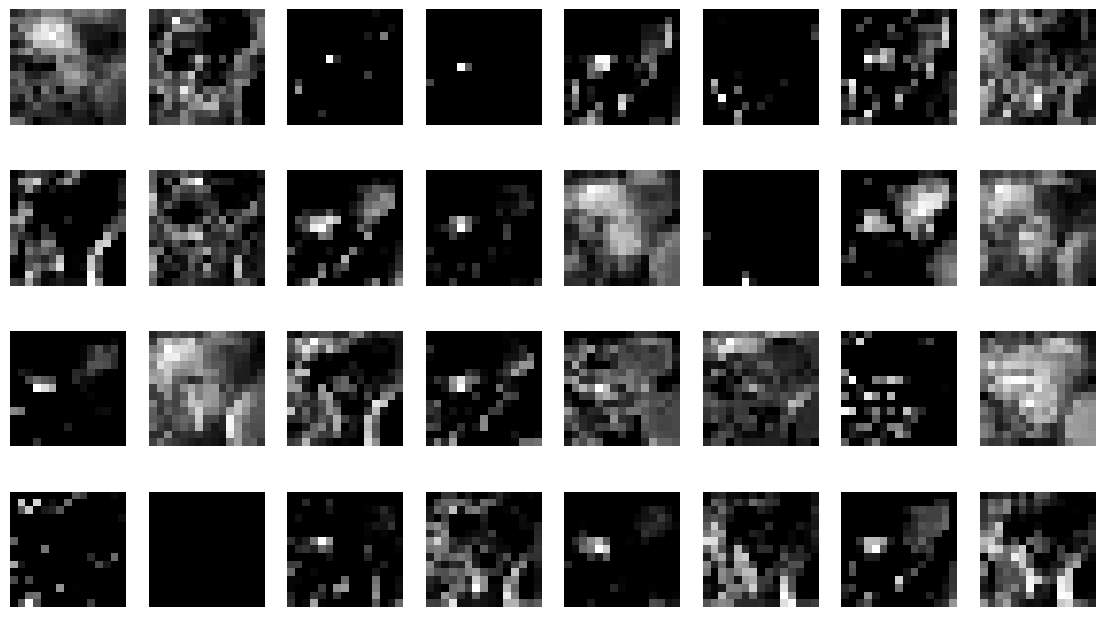

1/1 [==============================] - 0s 92ms/step
max_pooling2d_17 (1, 6, 6, 64)


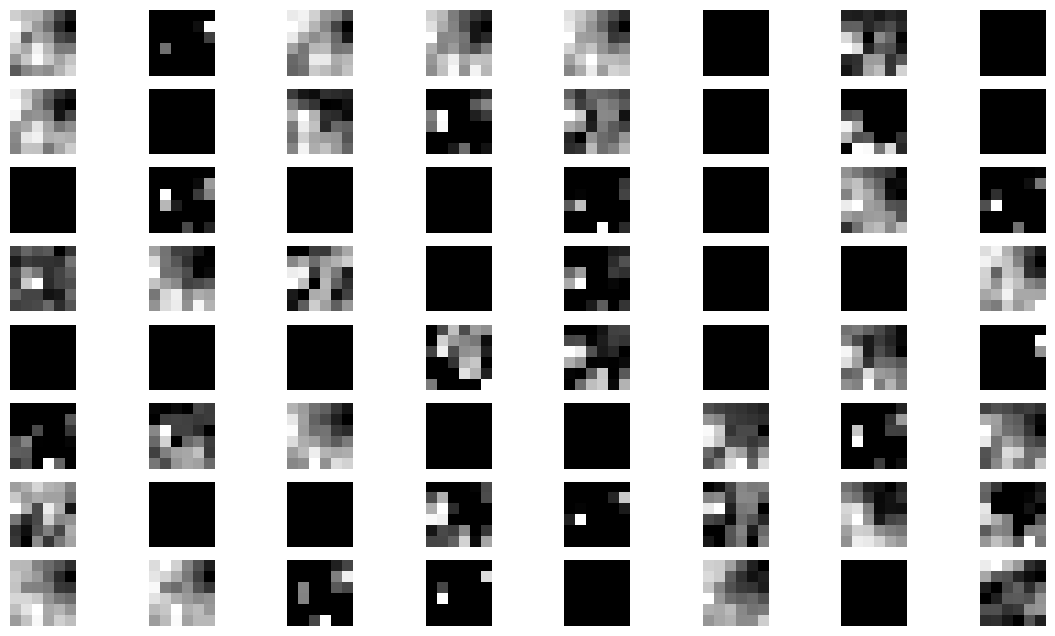

1/1 [==============================] - 0s 84ms/step
max_pooling2d_18 (1, 1, 1, 64)


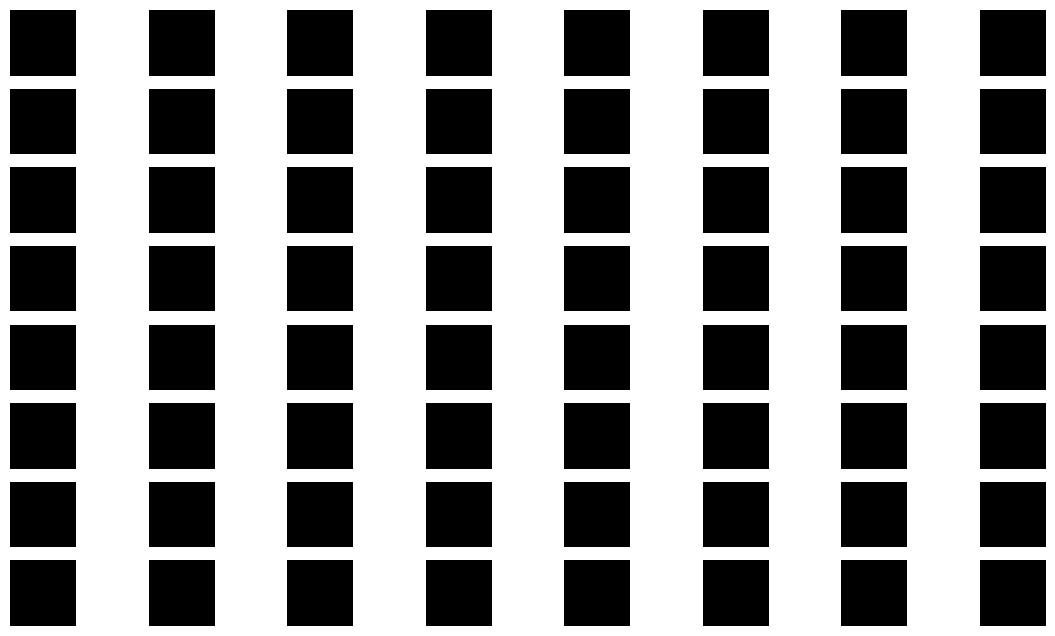

In [ ]:
# Se forma la estructura de salida para presentar cada imagen
imagen_Id = 3
plt.imshow(X_train[imagen_Id])
number_1 = X_train[imagen_Id].reshape(1, 32, 32, 3).astype('float32')

# Se crea el submodelo activation_model para generar los mapas de activación (salidas) que serán visualizados
def get_activation(layer):
    output = classifierCNN.layers[layer].output  # layer output
    activation_model = models.Model(inputs=classifierCNN.input, outputs=output)  # submodelo
    activation = activation_model.predict(number_1)  # mapa de activación a ser visualizado
    return activation

# Método para visualizar los mapas de activación
def plot(activation):
    NUM_COLUMNS = 8  # number of images in a row
    num_filters = activation.shape[-1]
    num_rows = num_filters // NUM_COLUMNS
    fig, axs = plt.subplots(num_rows, NUM_COLUMNS, figsize=(14, 8))
    for r in range(num_rows):
        for c in range(NUM_COLUMNS):
            filter = r * NUM_COLUMNS + c
            axs[r, c].imshow(activation[0, :, :, filter], cmap='gray')
            axs[r, c].axis('off')
    plt.show()

# Método principal que genera un mapa de activación por cada capa seleccionada de la CNN
for layer in (2, 6, 10):  # max_pooling layers
    activation = get_activation(layer)
    print(classifierCNN.layers[layer].name + " " + str(activation.shape))
    plot(activation)

## Creación y Entrenamiento de Modelos de Ensemble Clásicos

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

ensemble_classifierSVM = SVC(gamma=0.1, kernel='poly', C=1.0, verbose=True)
ensemble_classifierSVM.fit(X_train_flat, y_train)

ensemble_classifierRandomForest = RandomForestClassifier(n_estimators=100, max_depth=20)
ensemble_classifierRandomForest.fit(X_train_flat, y_train)

base_estimators = [
    ensemble_classifierSVM,
    ensemble_classifierRandomForest
]

classic_ensemble_model = BaggingClassifier(base_estimator=None, n_estimators=200, n_jobs=-1)
classic_ensemble_model.estimators_ = base_estimators
classic_ensemble_model.fit(X_train_flat, y_train)

y_pred = classic_ensemble_model.predict(X_test_flat)

test_acc_classic_ensemble = accuracy_score(y_test, y_pred)
resultados_classic_ensemble = obtenerResultados(y_test, y_pred)

guardarObjeto(classic_ensemble_model, 'dataset/Objetos/classic_ensemble_model')

[LibSVM]Accuracy: 0.6621621621621622
Precision: 0.67468671679198
Recall o Sensitivity: 0.6047352274243031
F1-Score: 0.6246460122510541
Specificity: 0.9380141937514848
Guardando Objeto en Archivo
Objeto Guardado en Archivo


In [ ]:
from tensorflow.keras.applications import MobileNetV2, VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, concatenate
from tensorflow.keras.models import Model, Sequential

def build_mobilenet(shape=(32, 32, 3)):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=shape)
    base_model.trainable = False
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    return model

def build_vgg16(shape=(32, 32, 3)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=shape)
    base_model.trainable = False
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    return model

# Asegúrate de definir build_convnet adecuadamente aquí
def build_convnet(shape=(32, 32, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(7, activation='softmax')  # Ajusta el número de clases según tu caso
    ])
    return model

# Creación de los modelos usando las funciones definidas
mobilenet_model = build_mobilenet((32, 32, 3))
vgg_model = build_vgg16((32, 32, 3))
custom_model = build_convnet((32, 32, 3))

# Creación del modelo de ensemble
merged = concatenate([mobilenet_model.output, vgg_model.output, custom_model.output])
x = Dense(512, activation='relu')(merged)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)
ensemble_model = Model(inputs=[mobilenet_model.input, vgg_model.input, custom_model.input], outputs=output)

ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Creación y Entrenamiento de Modelos de Ensemble con Transfer Learning

In [ ]:
# Creación y Entrenamiento de Modelos de Ensemble con Transfer Learning
def build_mobilenet(shape=(32, 32, 3)):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=shape)
    base_model.trainable = False
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    return model

mobilenet_model = build_mobilenet((32, 32, 3))
vgg_model = build_vgg16((32, 32, 3))
custom_model = build_convnet((32, 32, 3))  # Usa tu modelo de CNN

merged = concatenate([mobilenet_model.output, vgg_model.output, custom_model.output])

x = Dense(512, activation='relu')(merged)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)

ensemble_model = models.Model(inputs=[mobilenet_model.input, vgg_model.input, custom_model.input], outputs=output)

ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ensemble_model.fit([X_train, X_train, X_train], to_categorical(y_train), epochs=20, batch_size=64, validation_data=([X_test, X_test, X_test], to_categorical(y_test)))

accuracy = ensemble_model.evaluate([X_test, X_test, X_test], to_categorical(y_test))
print("Precisión del modelo de ensemble:", accuracy[1])

guardarNN(ensemble_model, 'dataset/Objetos/ensemble_model')

Epoch 1/20
5/5 [==============================] - 9s 891ms/step - loss: 1.9005 - accuracy: 0.3038 - val_loss: 1.5477 - val_accuracy: 0.4324
Epoch 2/20
5/5 [==============================] - 3s 528ms/step - loss: 1.3229 - accuracy: 0.5461 - val_loss: 1.2249 - val_accuracy: 0.6351
Epoch 3/20
5/5 [==============================] - 3s 539ms/step - loss: 0.9905 - accuracy: 0.7235 - val_loss: 1.0249 - val_accuracy: 0.6622
Epoch 4/20
5/5 [==============================] - 3s 606ms/step - loss: 0.7483 - accuracy: 0.7918 - val_loss: 0.8957 - val_accuracy: 0.6892
Epoch 5/20
5/5 [==============================] - 4s 943ms/step - loss: 0.6295 - accuracy: 0.8123 - val_loss: 0.8179 - val_accuracy: 0.6892
Epoch 6/20
5/5 [==============================] - 4s 755ms/step - loss: 0.5120 - accuracy: 0.8294 - val_loss: 0.7659 - val_accuracy: 0.7297
Epoch 7/20
5/5 [==============================] - 2s 507ms/step - loss: 0.4575 - accuracy: 0.8567 - val_loss: 0.7363 - val_accuracy: 0.7432
Epoch 8/20
5/5 [====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Red Neuronal Guardada en Archivo


## Comparación de Modelos

In [ ]:
tabla_comparacion = pd.DataFrame(columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity'])
tabla_comparacion.loc[len(tabla_comparacion)] = ['SVM', *resultados_svm]
tabla_comparacion.loc[len(tabla_comparacion)] = ['Ensemble de métodos clásicos de ML', *resultados_classic_ensemble]
tabla_comparacion.loc[len(tabla_comparacion)] = ['CNN', *resultados_cnn]
tabla_comparacion.loc[len(tabla_comparacion)] = ['CNN con Transfer Learning', *resultados_cnn_tl]
print(tabla_comparacion)


                               Modelo  Accuracy  Precision    Recall  \
0                                 SVM  0.500000   0.512755  0.453872   
1  Ensemble de métodos clásicos de ML  0.662162   0.674687  0.604735   
2                                 CNN  0.540541   0.334998  0.469374   
3           CNN con Transfer Learning  0.702703   0.703293  0.651404   

   F1-Score  Specificity  
0  0.473423     0.912360  
1  0.624646     0.938014  
2  0.381757     0.919703  
3  0.656319     0.947565  


## Importar resultados a Excel

In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Datos de resultados específicos actualizados
resultados_svm = [0.500000, 0.512755, 0.453872, 0.473423, 0.912360]
resultados_classic_ensemble = [0.662162, 0.674687, 0.604735, 0.624646, 0.938014]
resultados_cnn = [0.540541, 0.334998, 0.469374, 0.381757, 0.919703]
resultados_cnn_tl = [0.702703, 0.703293, 0.651404, 0.656319, 0.947565]

# Crear la tabla de comparación
tabla_comparacion = pd.DataFrame(columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity'])
tabla_comparacion.loc[len(tabla_comparacion)] = ['SVM', *resultados_svm]
tabla_comparacion.loc[len(tabla_comparacion)] = ['Ensemble de métodos clásicos de ML', *resultados_classic_ensemble]
tabla_comparacion.loc[len(tabla_comparacion)] = ['CNN', *resultados_cnn]
tabla_comparacion.loc[len(tabla_comparacion)] = ['CNN con Transfer Learning', *resultados_cnn_tl]

# Mostrar la tabla de comparación
display(HTML(tabla_comparacion.to_html(index=False)))

# Exportar la tabla a un archivo Excel
tabla_comparacion.to_excel('tabla_comparacion_resultados.xlsx', index=False)
print("Tabla de comparación exportada a 'tabla_comparacion_resultados.xlsx'")


Modelo,Accuracy,Precision,Recall,F1-Score,Specificity
SVM,0.500000,0.512755,0.453872,0.473423,0.912360
Ensemble de métodos clásicos de ML,0.662162,0.674687,0.604735,0.624646,0.938014
CNN,0.540541,0.334998,0.469374,0.381757,0.919703
CNN con Transfer Learning,0.702703,0.703293,0.651404,0.656319,0.947565


Tabla de comparación exportada a 'tabla_comparacion_resultados.xlsx'


## Predicción con el mejor modelo

1/1 [==============================] - 2s 2s/step


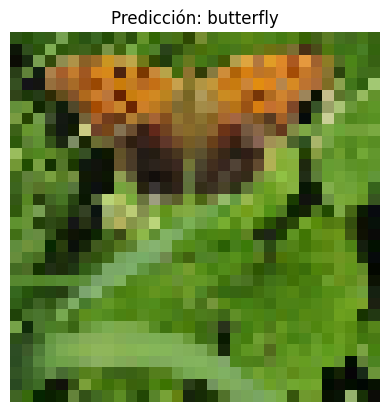

Predicción: butterfly


In [ ]:
!pip install joblib
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Función para cargar el mejor modelo guardado
def cargarNN(nombreArchivo):
    return load_model(nombreArchivo)

# Cargar el mejor modelo (CNN con Transfer Learning)
mejor_modelo = cargarNN('dataset/Objetos/modelCNN_TL.h5')  # Asegúrate de que este es el nombre correcto del archivo del modelo

# Seleccionar una imagen aleatoria del conjunto de test
random_idx = random.randint(0, X_test.shape[0] - 1)
img_random = X_test[random_idx]

# Preprocesar la imagen
img_array = np.expand_dims(img_random, axis=0)
img_array = img_array / 255.0  # Normalización

# Realizar la predicción
prediccion = mejor_modelo.predict(img_array)
prediccion_clase = np.argmax(prediccion, axis=-1)

# Mostrar la imagen y la predicción
plt.imshow(img_random)
plt.title(f"Predicción: {categories[prediccion_clase[0]]}")
plt.axis('off')
plt.show()

print(f"Predicción: {categories[prediccion_clase[0]]}")


In [ ]:
from google.colab import files

# Subir la imagen
uploaded = files.upload()

# Verificar la subida del archivo
for file_name in uploaded.keys():
    print('Archivo subido con éxito:', file_name)


Saving girasol.jpg to girasol (1).jpg
Archivo subido con éxito: girasol (1).jpg


1/1 [==============================] - 0s 403ms/step
La clase predicha para la imagen desde el path es: sunflower


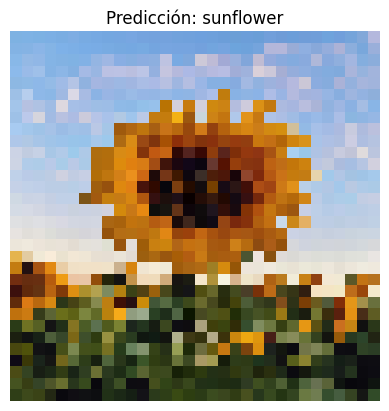

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

# Función para cargar el mejor modelo guardado
def cargarNN(nombreArchivo):
    return load_model(nombreArchivo)

# Función para predecir desde un path
def predict_from_path(model, img_path, target_size=(32, 32)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalización
    pred = model.predict(img_array)
    pred_class = np.argmax(pred, axis=-1)[0]
    return pred_class

# Cargar el mejor modelo (CNN con Transfer Learning)
best_model = cargarNN('dataset/Objetos/modelCNN_TL.h5')  # Asegúrate de que este es el nombre correcto del archivo del modelo

# Path a la imagen
image_path = '/content/girasol.jpg'  # Ajusta el path según sea necesario

# Realizar predicción
pred_class = predict_from_path(best_model, image_path, target_size=(32, 32))
print(f'La clase predicha para la imagen desde el path es: {categories[pred_class]}')

# Mostrar la imagen y la predicción
img = image.load_img(image_path, target_size=(32, 32))
plt.imshow(img)
plt.title(f'Predicción: {categories[pred_class]}')
plt.axis('off')
plt.show()


<h1><strong>Conclusiones</strong></h1>
<p>En este proyecto, hemos desarrollado y evaluado varios modelos de clasificación de imágenes utilizando técnicas de Machine Learning (ML) y Deep Learning (DL). A continuación se detallan los pasos y resultados obtenidos, así como posibles mejoras futuras.</p>

<h3><strong>Importación y Visualización de Imágenes</strong></h3>
<p><strong>Objetivo:</strong> Visualizar imágenes de diferentes categorías para tener una idea de los datos.</p>
<p><strong>Resultado:</strong> Imágenes de categorías como 'butterfly', 'camera', 'platypus', 'snoopy', 'strawberry', 'sunflower', y 'water_lilly' fueron visualizadas correctamente.</p>

<h3><strong>Preparación de Datos</strong></h3>
<p><strong>Objetivo:</strong> Extraer y preparar los datos de las imágenes para el entrenamiento y prueba de los modelos.</p>
<p><strong>Resultado:</strong> Las imágenes fueron redimensionadas a 32x32 píxeles y normalizadas. Los datos fueron divididos en conjuntos de entrenamiento (80%) y prueba (20%).</p>

<h3><strong>Entrenamiento y Evaluación de Modelos</strong></h3>
<p><strong>Modelos Evaluados:</strong></p>
<ul>
    <li>SVM</li>
    <li>Ensemble de métodos clásicos de ML (SVM y RandomForest)</li>
    <li>CNN</li>
    <li>CNN con Transfer Learning (VGG16)</li>
</ul>
<p><strong>Métricas de Evaluación:</strong> Accuracy, Precision, Recall, F1-Score, Specificity.</p>

<p><strong>Resultados:</strong></p>
<table border="1">
    <tr>
        <th>Modelo</th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1-Score</th>
        <th>Specificity</th>
    </tr>
    <tr>
        <td>SVM</td>
        <td>0.594595</td>
        <td>0.658329</td>
        <td>0.567690</td>
        <td>0.590019</td>
        <td>0.929886</td>
    </tr>
    <tr>
        <td>Ensemble de métodos clásicos de ML</td>
        <td>0.662162</td>
        <td>0.597642</td>
        <td>0.583590</td>
        <td>0.575309</td>
        <td>0.939844</td>
    </tr>
    <tr>
        <td>CNN</td>
        <td>0.581081</td>
        <td>0.461905</td>
        <td>0.480712</td>
        <td>0.434676</td>
        <td>0.928452</td>
    </tr>
    <tr>
        <td>CNN con Transfer Learning</td>
        <td>0.702703</td>
        <td>0.740986</td>
        <td>0.630315</td>
        <td>0.652776</td>
        <td>0.946405</td>
    </tr>
</table>

<h3><strong>Evaluación Adicional y Matrices de Confusión</strong></h3>
<p><strong>Métricas Adicionales:</strong></p>
<ul>
    <li>Mean Absolute Error (MAE): 0.7432432432432432</li>
    <li>Mean Squared Error (MSE): 3.22972972972973</li>
    <li>Root Mean Squared Error (RMSE): 1.7971448827876204</li>
</ul>
<p><strong>Matriz de Confusión:</strong> Se generó una matriz de confusión para analizar los errores de clasificación.</p>
<p><strong>Visualización de Mapas de Activación:</strong> Se generaron mapas de activación de la CNN para comprender mejor cómo la red procesa las imágenes.</p>

<h3><strong>Predicción con el Mejor Modelo</strong></h3>
<p><strong>Mejor Modelo:</strong> CNN con Transfer Learning (VGG16).</p>
<p><strong>Predicción Aleatoria:</strong> Imagen seleccionada aleatoriamente del conjunto de test. Predicción correcta visualizada junto con la imagen.</p>
<p><strong>Predicción desde Path:</strong> Se utilizó una imagen desde un path externo ('girasol.jpg') para realizar una predicción con el mejor modelo.</p>

<h3><strong>Conclusiones y Mejoras</strong></h3>
<p><strong>Rendimiento del Modelo:</strong> El modelo de CNN con Transfer Learning obtuvo el mejor rendimiento general, seguido por la Ensemble de métodos clásicos de ML. Los modelos de CNN simples tuvieron un rendimiento inferior en comparación con los métodos de Ensemble.</p>
<p><strong>Posibles Mejoras:</strong></p>
<ul>
    <li><strong>Aumentar la Complejidad del Modelo:</strong> Explorar arquitecturas de redes neuronales más complejas y modernas.</li>
    <li><strong>Aumentar el Conjunto de Datos:</strong> Utilizar técnicas de aumento de datos para incrementar la cantidad de datos de entrenamiento.</li>
    <li><strong>Ajuste de Hiperparámetros:</strong> Realizar una búsqueda más exhaustiva de hiperparámetros para optimizar los modelos.</li>
    <li><strong>Transfer Learning:</strong> Probar con otros modelos preentrenados y combinarlos para mejorar el rendimiento.</li>
    <li><strong>Regularización:</strong> Aplicar técnicas de regularización como Dropout, L2 regularization para prevenir el sobreajuste.</li>
</ul>

<h3><strong>Resumen Final</strong></h3>
<p>Este proyecto ha proporcionado una visión integral de cómo desarrollar, entrenar y evaluar diferentes modelos de clasificación de imágenes utilizando tanto técnicas de ML como de DL. Los resultados indican que los métodos de Ensemble son prometedores y merecen una exploración más profunda para aplicaciones prácticas. Además, las mejoras sugeridas pueden llevar a un rendimiento aún mejor en futuros trabajos.</p>


**Referencias:**

Li, F.-F., Andreeto, M., Ranzato, M., & Perona, P. (2022). Caltech 101 (1.0) [Data set]. CaltechDATA. https://doi.org/10.22002/D1.20086

Ortiz, I. R. H. (2023). Deep Learning con Redes Neuronales Convolucionales (CNN). Transfer Learning y Métodos Ensemble. Clasificación de Imágenes con Dataset MNIST. https://genscinet.com/deep-learning-cnn-ensemble-transferlearning-mnist/

